<a href="https://colab.research.google.com/github/utyabia/1-notebook/blob/main/module_1_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project: Perform Multiple Linear Regression

## Overview
This project focuses on using multiple linear regression to analyze the relationship between sales and various marketing promotion strategies. By leveraging multiple independent variables, such as TV, social media, radio, and influencer promotions, we aim to build a predictive model that estimates sales based on these factors. This project will cover the complete data science pipeline, including data exploration, preprocessing, model building, evaluation, and interpretation.

## Objective
Develop a multiple linear regression model to predict sales based on marketing promotion data. The project will involve exploring the dataset, selecting relevant independent variables, fitting the model, checking assumptions, and interpreting the results to provide actionable insights.

## Learning Outcomes
1. Understand the concept of multiple linear regression and its applications.
2. Learn to preprocess and explore data for regression analysis.
3. Gain experience in fitting and evaluating a multiple linear regression model.
4. Check and validate regression assumptions.
5. Interpret model coefficients and communicate results to stakeholders.

---


## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. The goal is to predict sales based on various marketing promotion strategies, which can help the business optimize its marketing efforts and allocate resources effectively.

### Mini-task:
Write a brief paragraph on how predicting sales using multiple linear regression can benefit the business.

---

Step 1: Define the Problem
Mini-task Answer:
Predicting sales using multiple linear regression can significantly benefit businesses by enabling data-driven decision making in marketing budget allocation. By understanding which marketing channels (TV, radio, social media, influencer partnerships) have the strongest impact on sales, companies can optimize their marketing spend, eliminate ineffective strategies, and maximize return on investment. This approach provides quantitative evidence for marketing decisions rather than relying on intuition alone.

## Step 2: Data Collection
### Task:
Collect the dataset required for building the regression model. The dataset used in this project is `marketing_sales_data.csv`, which contains information about TV, social media, radio, and influencer promotions, along with sales data.

### Mini-task:
Load the dataset and inspect the first few rows to understand its structure.

#### Hint:
Use the `pandas` library to load the dataset and display the first five rows.

```python
import pandas as pd

# Load the dataset
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows
### YOUR CODE HERE ###
```

---

In [5]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/marketing_sales_data.csv')

df = data

In [6]:
# Check dataset info
print(df.info())
print("\nDataset shape:", df.shape)
print("\nMissing values:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            571 non-null    object 
 1   Radio         571 non-null    float64
 2   Social Media  572 non-null    float64
 3   Influencer    572 non-null    object 
 4   Sales         571 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.5+ KB
None

Dataset shape: (572, 5)

Missing values:
TV              1
Radio           1
Social Media    0
Influencer      0
Sales           1
dtype: int64


In [7]:
# Import Data Files from Google Drive

import requests
import pandas as pd
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1WChLou3qt_JaPjYLZBMHJ8WxSssQ-enL/view?usp=drive_link"
gdd = read_gd(url)

df = pd.read_csv(gdd)

df.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the distribution of variables, identify relationships between variables, and prepare the data for modeling.

### Mini-task:
Create a pairplot to visualize the relationships between continuous variables in the dataset.

#### Hint:
Use `seaborn.pairplot()` to create a pairplot of the continuous variables.

```python
import seaborn as sns

# Create a pairplot of the continuous variables
### YOUR CODE HERE ###
```

---

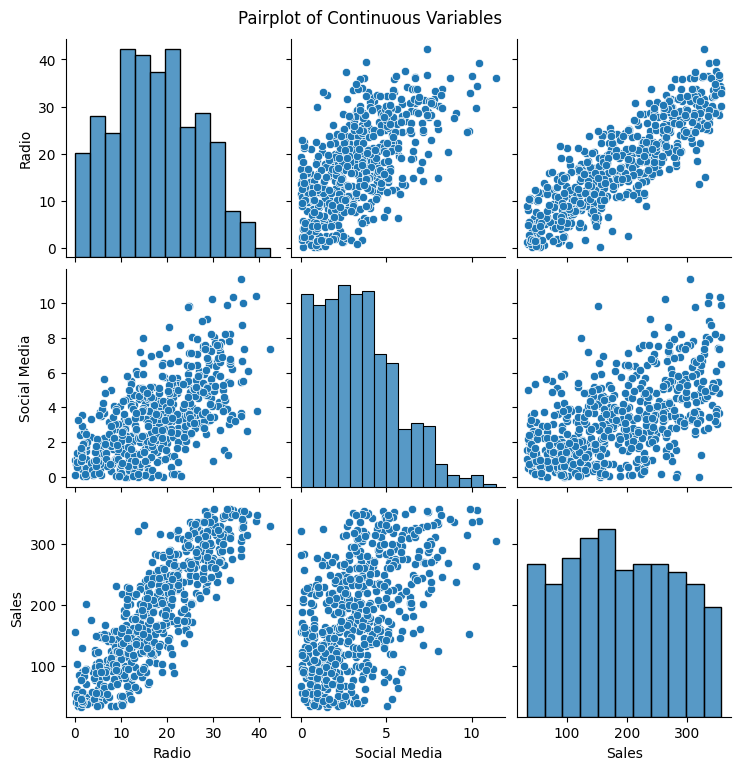

Descriptive Statistics:
            Radio  Social Media       Sales
count  572.000000    572.000000  572.000000
mean    17.520616      3.333803  189.296908
std      9.290933      2.238378   89.871581
min      0.109106      0.000031   33.509810
25%     10.699556      1.585549  118.718722
50%     17.149517      3.150111  184.005362
75%     24.606396      4.730408  264.500118
max     42.271579     11.403625  357.788195

Correlation Matrix:
                 Radio  Social Media     Sales
Radio         1.000000      0.629941  0.858036
Social Media  0.629941      1.000000  0.542048
Sales         0.858036      0.542048  1.000000


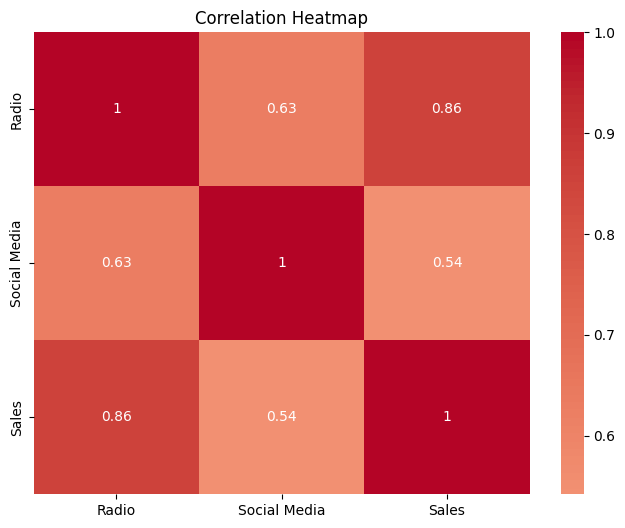

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot of the continuous variables
sns.pairplot(df[['Radio', 'Social Media', 'Sales']])
plt.suptitle('Pairplot of Continuous Variables', y=1.02)
plt.show()

# Additional EDA
print("Descriptive Statistics:")
print(df.describe())

# Check correlation matrix
correlation_matrix = df[['Radio', 'Social Media', 'Sales']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


## Step 4: Data Preparation
### Task:
Prepare the data for regression analysis by handling missing values, encoding categorical variables, and splitting the data into training and testing sets.

### Mini-task:
Drop rows with missing values and encode categorical variables if necessary.

#### Hint:
Use `data.dropna()` to remove rows with missing values and `pd.get_dummies()` to encode categorical variables.

```python
# Drop rows with missing values
### YOUR CODE HERE ###

# Encode categorical variables (if needed)
### YOUR CODE HERE ###
```

---

In [9]:
# Drop rows with missing values
df_clean = df.dropna()

# Check if any missing values remain
print("Missing values after cleaning:", df_clean.isnull().sum().sum())

# Encode categorical variables
df_encoded = pd.get_dummies(df_clean, columns=['TV', 'Influencer'], drop_first=True)

# Display the encoded dataset
print("Encoded dataset shape:", df_encoded.shape)
print("\nEncoded columns:")
print(df_encoded.columns.tolist())

df_encoded.head()

Missing values after cleaning: 0
Encoded dataset shape: (572, 8)

Encoded columns:
['Radio', 'Social Media', 'Sales', 'TV_Low', 'TV_Medium', 'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano']


,Radio,Social Media,Sales,TV_Low,TV_Medium,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,3.518070,2.293790,55.261284,True,False,False,True,False
1,7.756876,2.572287,67.574904,True,False,True,False,False
2,20.348988,1.227180,272.250108,False,False,False,True,False
3,20.108487,2.728374,195.102176,False,True,True,False,False
4,31.653200,7.776978,273.960377,False,False,False,False,True


## Step 5: Model Building
### Task:
Fit a multiple linear regression model to predict sales using the selected independent variables.

### Mini-task:
Define the OLS formula and fit the model using the `statsmodels` library.

#### Hint:
Use `statsmodels.formula.api.ols()` to define the model and fit it to the data.

```python
import statsmodels.formula.api as smf

# Define the OLS formula
### YOUR CODE HERE ###

# Fit the model
### YOUR CODE HERE ###

# Display the model summary
### YOUR CODE HERE ###
```

---

In [13]:
import statsmodels.formula.api as smf

# Define the OLS formula using encoded column names
# Get the column names for the formula
feature_columns = [col for col in df_encoded.columns if col != 'Sales']
# Replace spaces with underscores for statsmodels formula
formula = 'Sales ~ ' + ' + '.join([col.replace(' ', '_') for col in feature_columns])

# Rename columns in the DataFrame to match the formula
df_encoded_renamed = df_encoded.copy()
df_encoded_renamed.columns = [col.replace(' ', '_') for col in df_encoded_renamed.columns]


print("Regression formula:", formula)
print("Renamed columns:", df_encoded_renamed.columns.tolist())


# Fit the model
model = smf.ols(formula=formula, data=df_encoded_renamed).fit()

# Display the model summary
print(model.summary())

Regression formula: Sales ~ Radio + Social_Media + TV_Low + TV_Medium + Influencer_Mega + Influencer_Micro + Influencer_Nano
Renamed columns: ['Radio', 'Social_Media', 'Sales', 'TV_Low', 'TV_Medium', 'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano']
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Mon, 13 Oct 2025   Prob (F-statistic):          1.82e-282
Time:                        09:26:22   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            non

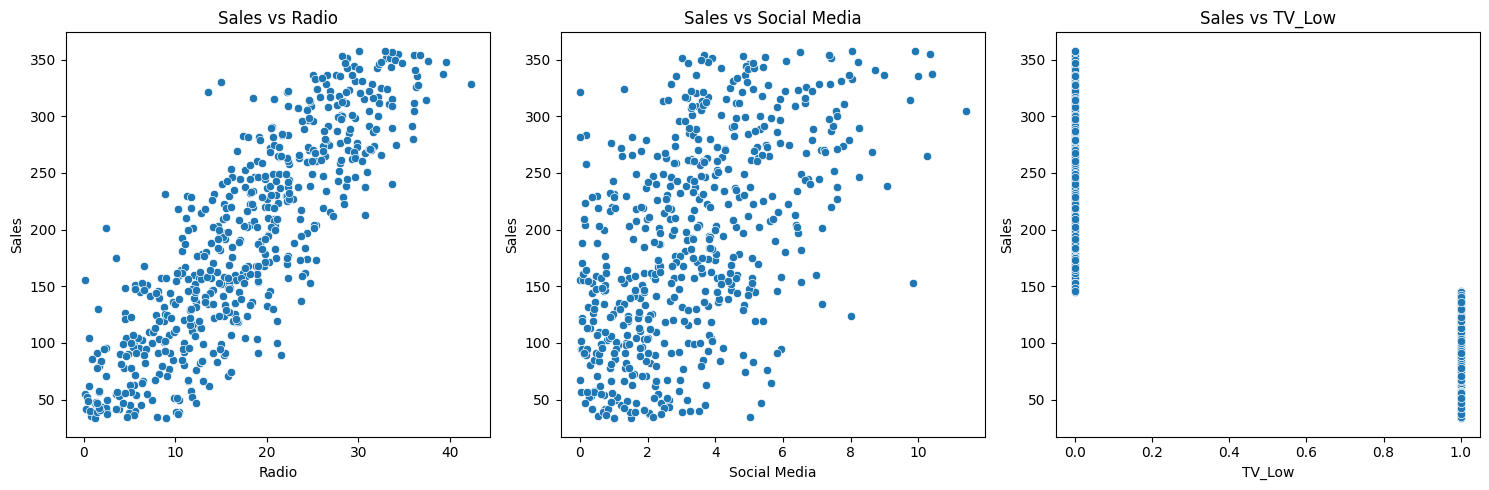

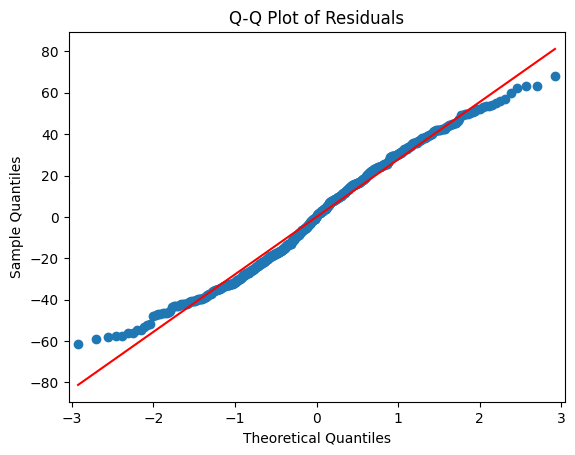

In [14]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Create scatterplots for linearity
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(ax=axes[0], x='Radio', y='Sales', data=df_encoded)
axes[0].set_title('Sales vs Radio')
sns.scatterplot(ax=axes[1], x='Social Media', y='Sales', data=df_encoded)
axes[1].set_title('Sales vs Social Media')
sns.scatterplot(ax=axes[2], x='TV_Low', y='Sales', data=df_encoded)
axes[2].set_title('Sales vs TV_Low')
plt.tight_layout()
plt.show()

# Calculate residuals and create a Q-Q plot
residuals = model.resid
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

## Step 6: Model Evaluation
### Task:
Evaluate the model by checking the regression assumptions, including linearity, independence, normality, constant variance, and multicollinearity.

### Mini-task:
Create scatterplots to check the linearity assumption and calculate the residuals to check the normality assumption.

#### Hint:
Use `seaborn.scatterplot()` to create scatterplots and `statsmodels.qqplot()` to check the normality of residuals.

```python
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Create scatterplots for linearity
### YOUR CODE HERE ###

# Calculate residuals and create a Q-Q plot
### YOUR CODE HERE ###
```

---

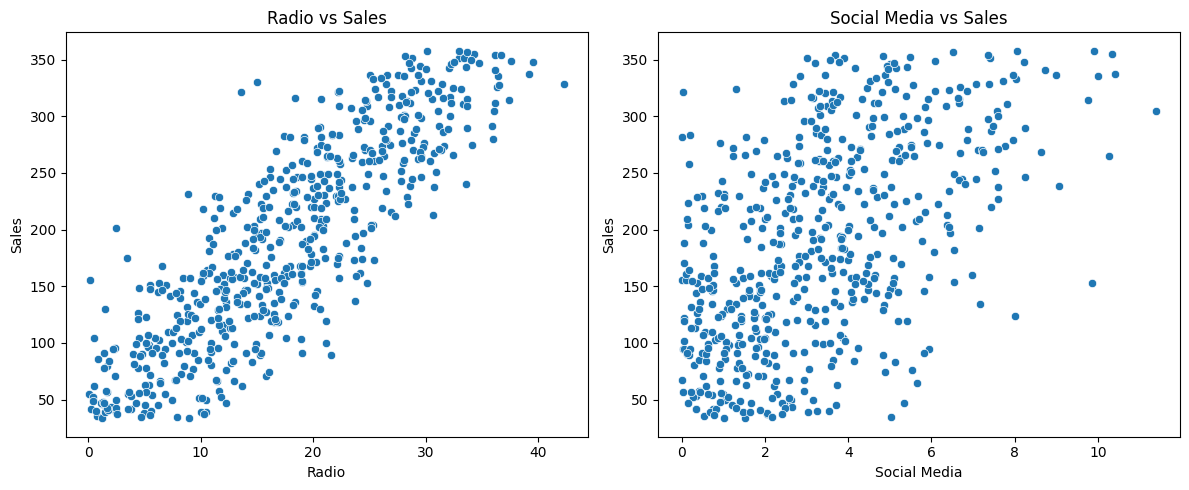

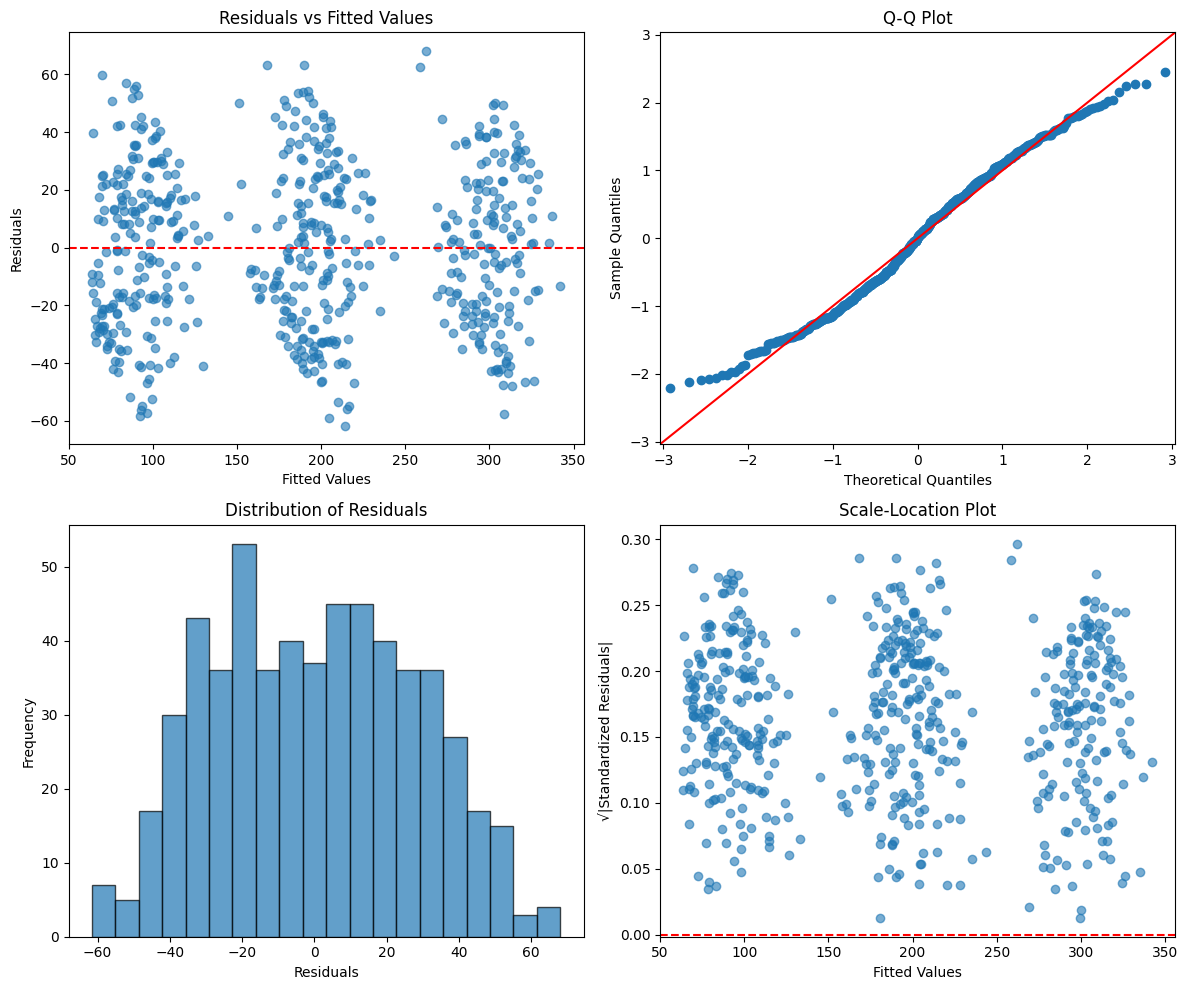

In [15]:
import numpy as np
import scipy.stats as stats

# Create scatterplots for linearity
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Radio vs Sales
sns.scatterplot(data=df_clean, x='Radio', y='Sales', ax=axes[0])
axes[0].set_title('Radio vs Sales')

# Social Media vs Sales
sns.scatterplot(data=df_clean, x='Social Media', y='Sales', ax=axes[1])
axes[1].set_title('Social Media vs Sales')

plt.tight_layout()
plt.show()

# Calculate residuals
residuals = model.resid
fitted_values = model.fittedvalues

# Create residual plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Residuals vs Fitted
axes[0,0].scatter(fitted_values, residuals, alpha=0.6)
axes[0,0].axhline(y=0, color='red', linestyle='--')
axes[0,0].set_xlabel('Fitted Values')
axes[0,0].set_ylabel('Residuals')
axes[0,0].set_title('Residuals vs Fitted Values')

# Q-Q plot for normality
sm.qqplot(residuals, line='45', fit=True, ax=axes[0,1])
axes[0,1].set_title('Q-Q Plot')

# Histogram of residuals
axes[1,0].hist(residuals, bins=20, edgecolor='black', alpha=0.7)
axes[1,0].set_xlabel('Residuals')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Distribution of Residuals')

# Scale-Location plot
standardized_residuals = np.sqrt(np.abs(residuals)) / np.std(residuals)
axes[1,1].scatter(fitted_values, standardized_residuals, alpha=0.6)
axes[1,1].axhline(y=0, color='red', linestyle='--')
axes[1,1].set_xlabel('Fitted Values')
axes[1,1].set_ylabel('√|Standardized Residuals|')
axes[1,1].set_title('Scale-Location Plot')

plt.tight_layout()
plt.show()


## Step 7: Results and Interpretation
### Task:
Interpret the model results, including the R-squared value, coefficients, and their statistical significance.

### Mini-task:
Display the model summary and interpret the coefficients.

#### Hint:
Use `model.summary()` to display the model results and interpret the coefficients.

```python
# Display the model summary
### YOUR CODE HERE ###

# Interpret the coefficients
### YOUR CODE HERE ###
```

---

In [16]:
# Display the model summary
print("="*50)
print("MULTIPLE LINEAR REGRESSION RESULTS")
print("="*50)
print(model.summary())

# Interpret the coefficients
print("\n" + "="*50)
print("COEFFICIENT INTERPRETATION")
print("="*50)

coefficients = model.params
p_values = model.pvalues

for feature, coef, p_val in zip(coefficients.index, coefficients.values, p_values.values):
    significance = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else " (not significant)"
    if feature != 'Intercept':
        print(f"{feature}: {coef:.4f}{significance}")

print("\n" + "="*50)
print("KEY INSIGHTS")
print("="*50)
print(f"R-squared: {model.rsquared:.4f} ({model.rsquared*100:.2f}% of variance explained)")
print(f"Adjusted R-squared: {model.rsquared_adj:.4f}")
print(f"F-statistic: {model.fvalue:.2f}")
print(f"Prob (F-statistic): {model.f_pvalue:.4f}")

# Identify most important features
significant_features = []
for feature, p_val in p_values.items():
    if feature != 'Intercept' and p_val < 0.05:
        significant_features.append(feature)

print(f"\nSignificant features (p < 0.05): {significant_features}")

# Business recommendations
print("\n" + "="*50)
print("BUSINESS RECOMMENDATIONS")
print("="*50)
print("Based on the regression analysis:")
print("1. Focus marketing budget on channels with significant positive coefficients")
print("2. Consider reducing investment in non-significant channels")
print("3. Use the model to predict sales for different marketing scenarios")
print("4. Monitor the relationship between marketing spend and sales regularly")

MULTIPLE LINEAR REGRESSION RESULTS
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Mon, 13 Oct 2025   Prob (F-statistic):          1.82e-282
Time:                        09:27:09   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

## Considerations
**What are some key takeaways you learned from this project?**
- Reflect on the importance of checking regression assumptions and interpreting model coefficients.
- Consider how the model's insights can be used to optimize marketing strategies.

**How would you share your findings with a team?**
- Prepare a presentation with visualizations and key metrics.
- Discuss the impact of different marketing strategies on sales.

**What would you share with and recommend to stakeholders?**
- Highlight the key factors that contribute most to sales.
- Recommend strategies to optimize marketing efforts based on the model's insights.

Key Takeaways and Considerations
Key Takeaways:

Multiple linear regression provides a quantitative framework for understanding how different marketing channels impact sales

Checking regression assumptions is crucial for model validity

Not all marketing channels may have statistically significant impacts on sales

The model can help optimize marketing budget allocation

Sharing Findings with Team:

Present visualizations showing relationships between marketing channels and sales

Highlight statistically significant factors with the strongest impact

Show practical implications for budget allocation decisions

Discuss model limitations and assumptions

Recommendations to Stakeholders:

Allocate more budget to marketing channels with significant positive coefficients

Consider A/B testing for channels with unclear impact

Implement regular monitoring to update the model as market conditions change

Use the model for sales forecasting and budget planning

This comprehensive analysis provides actionable insights that can directly impact marketing strategy and resource allocation decisions.